## Naive Bayes- Spam or Ham Classification


`Naive Bayes` uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in text classification and with problems having multiple class labels.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the dataset: [SPAM COLLECTION](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [6]:
data = pd.read_csv('spam.csv',encoding="latin-1")

In [7]:
data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
664,ham,Yes baby! We can study all the positions of th...,NaN,NaN,NaN
1170,ham,"Yeah, we can probably swing by once my roommat...",NaN,NaN,NaN
5083,ham,Aiya we discuss later lar... Pick Ì_ up at 4 i...,NaN,NaN,NaN
961,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
4072,ham,Was the actual exam harder than NBME,NaN,NaN,NaN
2977,ham,Yar lor... Keep raining non stop... Or u wan 2...,NaN,NaN,NaN
2275,ham,Is that on the telly? No its Brdget Jones!,NaN,NaN,NaN
1022,ham,We still on for tonight?,NaN,NaN,NaN
212,ham,K:)k:)good:)study well.,NaN,NaN,NaN
135,ham,I only haf msn. It's yijue@hotmail.com,NaN,NaN,NaN


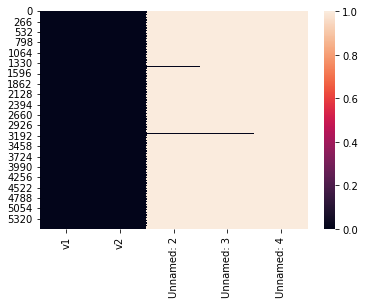

In [8]:
sns.heatmap(data.isnull())

In [9]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Plot Ham and Spam Total Count

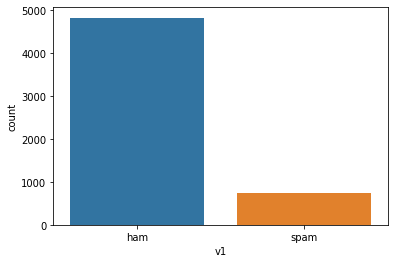

In [11]:
sns.countplot(data=data,x="v1")

### Check the Common Words in Text

In [12]:
from collections import Counter
common_counter = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
ham = pd.DataFrame(common_counter)
ham = ham.rename(columns={0: "Common Words In HAM", 1 : "count"})
common_counterS = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
spam = pd.DataFrame(common_counterS)
spam = spam.rename(columns={0: "Common Words In SPAM", 1 : "count"})

In [13]:
ham

,Common Words In HAM,count
0,to,1530
1,you,1458
2,I,1436
3,the,1019
4,a,969
5,and,738
6,i,736
7,in,734
8,u,645
9,is,638


In [14]:
spam

,Common Words In SPAM,count
0,to,604
1,a,358
2,your,187
3,call,185
4,or,185
5,the,178
6,2,169
7,for,169
8,you,164
9,is,143


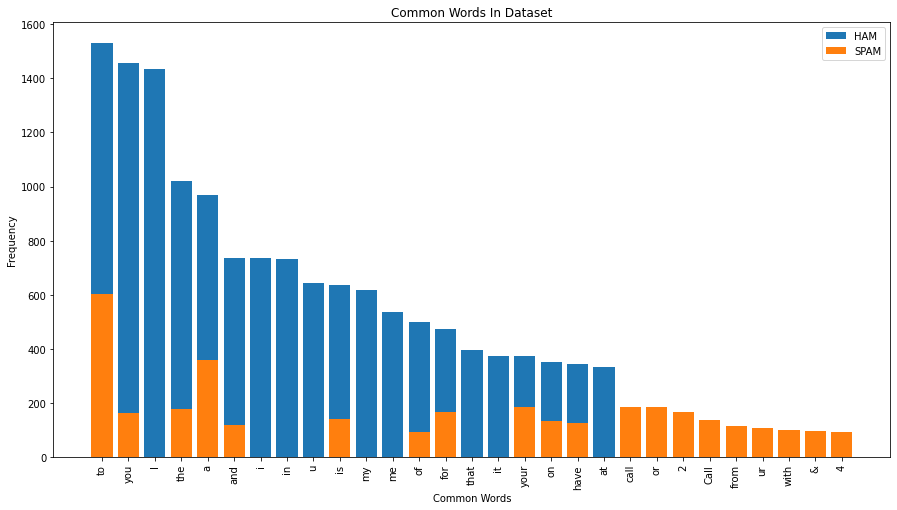

In [15]:
plt.figure(figsize=(15,8))
plt.bar(ham['Common Words In HAM'],ham['count'], label = 'HAM')
plt.bar(spam['Common Words In SPAM'],spam['count'], label = 'SPAM')
  
plt.xticks(rotation=90)
plt.xlabel("Common Words")
plt.ylabel("Frequency")
plt.title("Common Words In Dataset")
plt.legend()

### Feature Selection

Text preprocessing, tokenizing and filtering of common words/stopwords can be transformed into Vectors

In [16]:
from sklearn.feature_extraction import text
token = text.CountVectorizer(stop_words = 'english')
X = token.fit_transform(data["v2"])
np.shape(X)

(5572, 8404)

Stopwords is nothing but common words.

### Encode V1 i.e., SPAM and HAM

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(data['v1'])

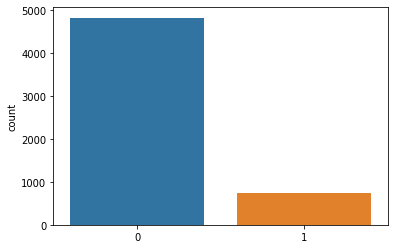

In [18]:
sns.countplot(x=Y,data=data)

#### 0- Ham and 1-Sapm

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Multinomial Naive Bayes classifier

The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP). The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.

It is a classification Algorithm that is suitable with discrete features (e.g., word counts for text classification).

In [20]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB(alpha=0.6)
model1.fit(X_train, y_train)

MultinomialNB(alpha=0.6)

In [21]:
predict = model1.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test,y_pred=predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1202
           1       0.90      0.93      0.91       191

    accuracy                           0.98      1393
   macro avg       0.94      0.96      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [27]:
model1.score(X_train,y_train)

0.9956927494615937

In [28]:
model1.score(X_test,y_test)

0.9755922469490309

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test,y_pred=predict)

array([[1182,   20],
       [  14,  177]])

### Gaussian Naive Bayes Classifier

Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution. An approach to create a simple model is to assume that the data is described by a Gaussian distribution with no co-variance (independent dimensions) between dimensions.

In [34]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()
model2.fit(X_train.toarray(),y_train)
predict2 = model2.predict(X_test.toarray())

In [35]:
print(classification_report(y_true=y_test,y_pred=predict2))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1202
           1       0.56      0.91      0.69       191

    accuracy                           0.89      1393
   macro avg       0.77      0.90      0.81      1393
weighted avg       0.93      0.89      0.90      1393



In [38]:
model2.score(X_train.toarray(),y_train)

0.9456807848767648

In [39]:
model2.score(X_test.toarray(),y_test)

0.8887293610911702

In [40]:
confusion_matrix(y_true=y_test,y_pred=predict2)

array([[1064,  138],
       [  17,  174]])

Read Documentation: [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)